In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_prediction(df, pred):
    plt.figure(figsize=(15, 5))
    plt.plot(df, "b-", label="data")
    plt.plot(pred, "g--", label="pred")
    plt.title("Monthly Minimum Temperature (°C)")
    plt.legend();
    
    
def plot_forecast(df, pred, t, y_pred):
    plt.figure(figsize=(15, 5))
    plt.plot(df, "b-", label="data")
    plt.plot(pred, "g--", label="pred")
    plt.plot(t, y_pred, "r-", label="forecast")
    plt.title("Monthly Minimum Temperature (°C)")
    plt.legend();  

# Import Data
sumber data: Australian Bureau of Meteorology, temperatur minimum harian di Melbourne<br>
Data tersebut saya resample menjadi periode bulanan.

In [3]:
df = pd.read_csv("data/monthly_min_temp.csv", index_col="Date", parse_dates=["Date"])
df.head()

,Temp
Date,
1981-01-31,12.1
1981-02-28,13.7
1981-03-31,8.0
1981-04-30,7.4
1981-05-31,2.1


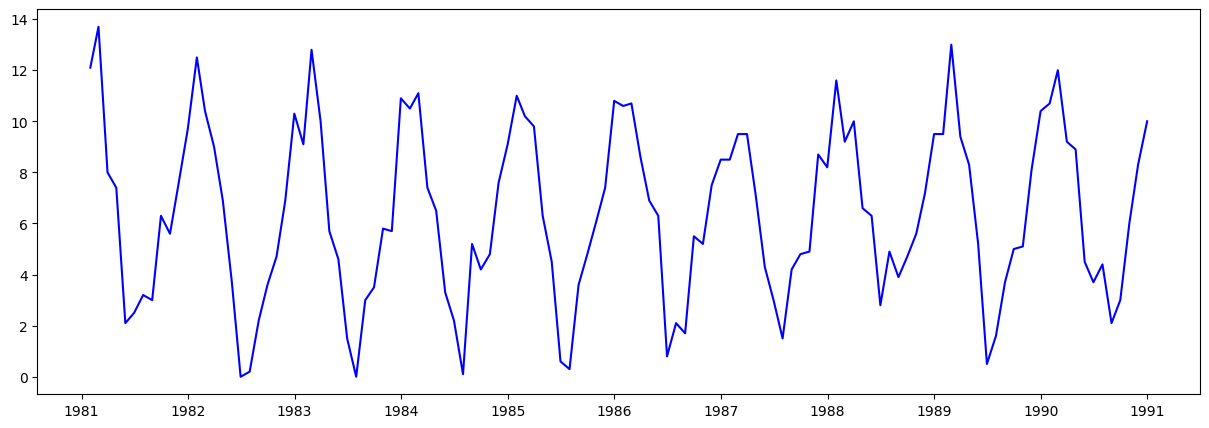

In [4]:
plt.figure(figsize=(15, 5))
plt.plot(df, "b-")

# Naive Time Series Forecasting

### One-shift

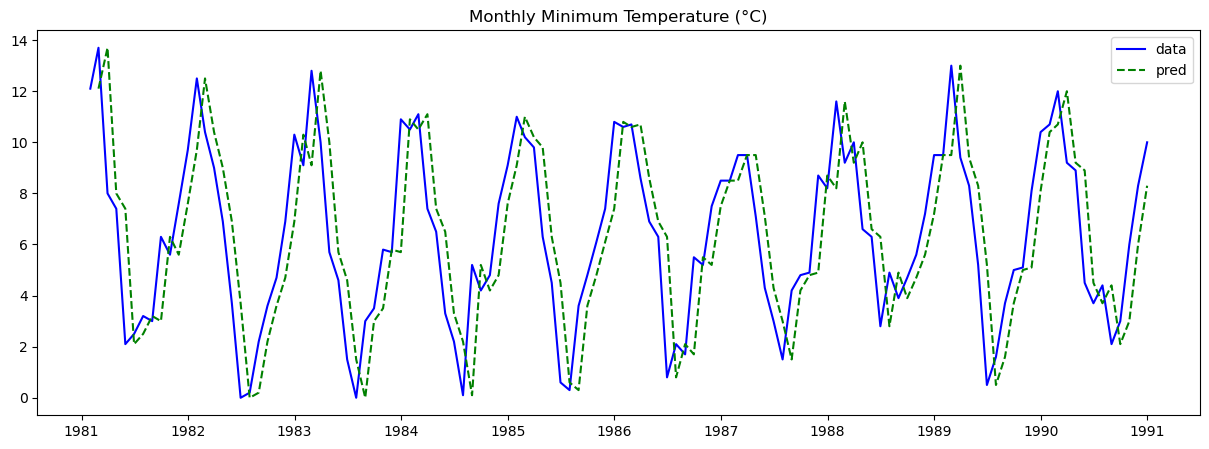

In [5]:
pred = df.Temp.shift()
plot_prediction(df, pred)

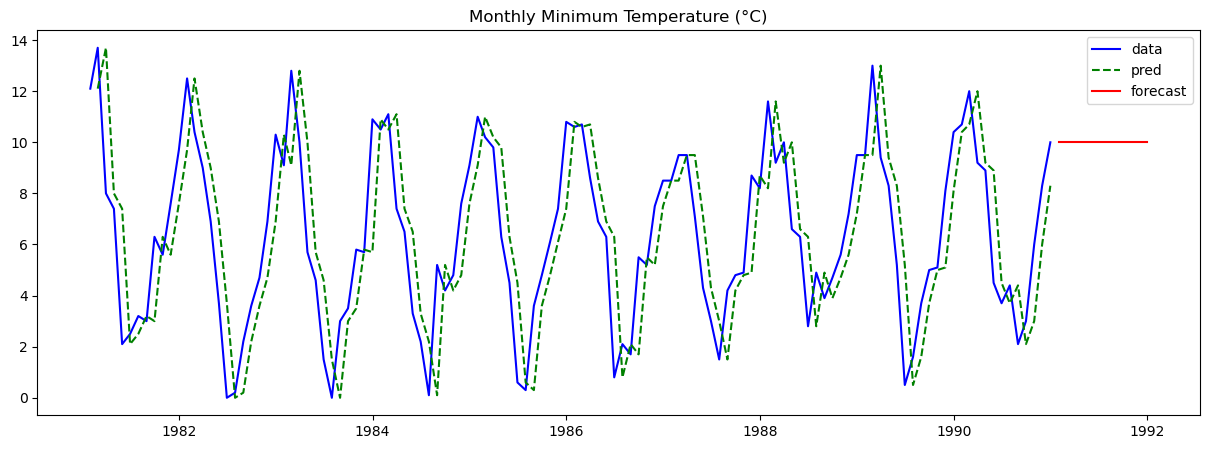

In [6]:
forecast_values = [df.Temp.iloc[-1]] * 12
forecast_dates = pd.date_range("1991-01-31", periods=12, freq="M")

plot_forecast(df, pred, forecast_dates, forecast_values)

### Mean as Forecast

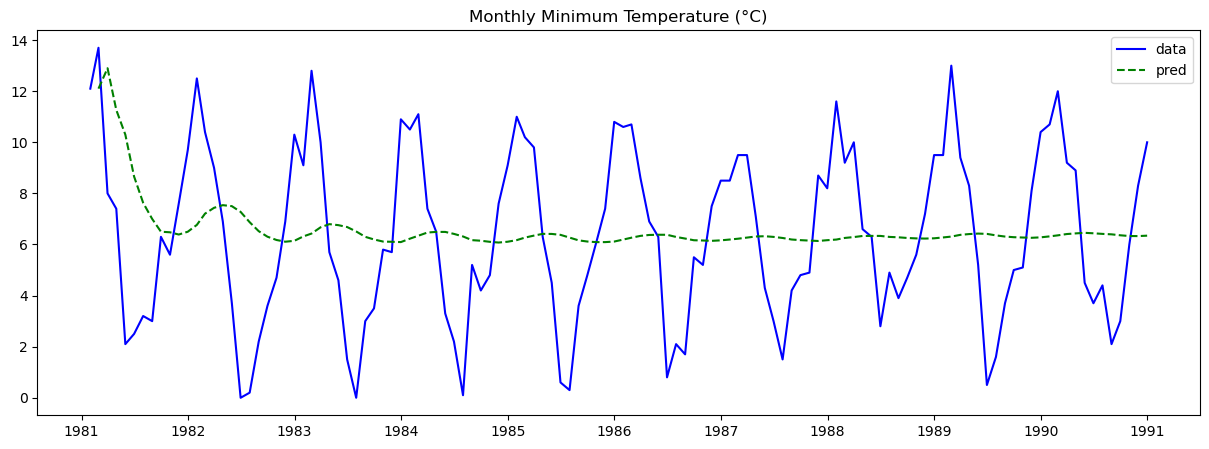

In [7]:
pred = df.copy()
pred.Temp = [df.loc[:date].Temp.mean() for date in df.index]
pred = pred.shift()

plot_prediction(df, pred)

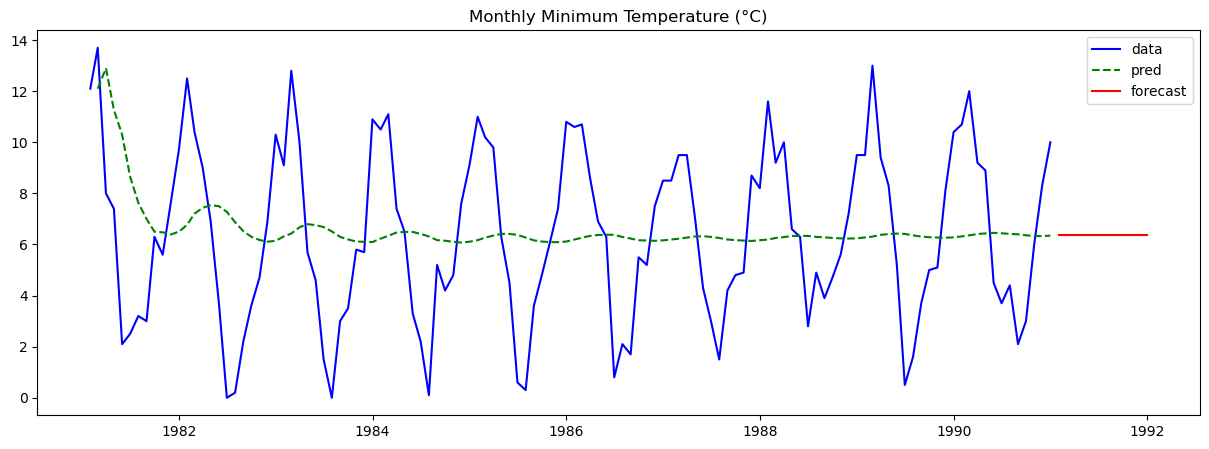

In [8]:
forecast_values = [df.Temp.mean()] * 12
forecast_dates = pd.date_range("1991-01-31", periods=12, freq="M")

plot_forecast(df, pred, forecast_dates, forecast_values)

### Moving Average / Rolling Mean Forecasting

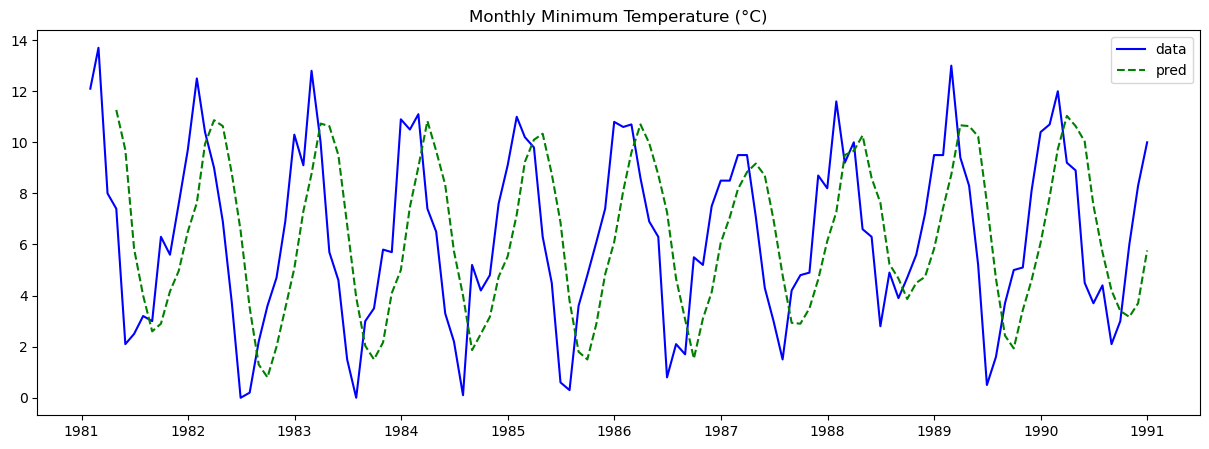

In [9]:
pred = df.copy()
pred.Temp = df.rolling(3).mean()
pred = pred.shift()

plot_prediction(df, pred)

In [10]:
from collections import deque

window = deque(maxlen=3)
window.extend(df.Temp.tail(3).tolist())

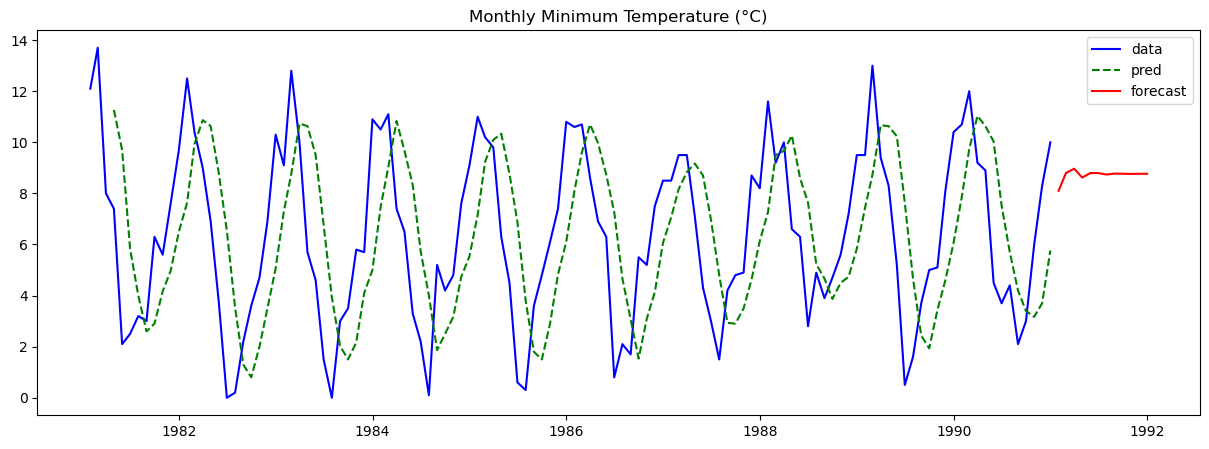

In [11]:
forecast_values = [np.mean(window)]
while len(forecast_values) < 12:
    window.append(forecast_values[-1])
    forecast_values.append(np.mean(window))
forecast_dates = pd.date_range("1991-01-31", periods=12, freq="M")

plot_forecast(df, pred, forecast_dates, forecast_values)